In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
class Tree:
    
    def __init__(self, maxHeight, numLayers):
        self.maxHeight = maxHeight #cm
        self.minLayerHeight = .1*maxHeight #cm
        self.maxRadius = 150 #cm
        self.minRadius = 10 #cm
        self.layers = []
        self.numLayers = numLayers
        self.layerHeights = np.linspace(self.minLayerHeight,maxHeight,numLayers)
        self.layerRadii = np.linspace(self.maxRadius,self.minRadius,numLayers)
        
        #TODO: find a better way to do the following
        for i in range(0,self.numLayers):
            if(i >= self.numLayers*(4/5)):
                self.layerRadii[i] = self.minRadius - (self.maxHeight - self.layerHeights[i])/(-1)
            else:
                self.layerRadii[i] = self.maxRadius
    
    def addLayer(self, newLayer):
        # error checking here
        self.layers.append(newLayer)
        self.layers = sorted(mainTree.layers, key=lambda x: x.height, reverse=True)

    def plotTree(self):
        # plot each layer on a 3D figure, rotate freely in notebook
        pass

In [3]:
class Layer():
    
    def __init__(self, height, radius, parity):
        self.height = height
        self.radius = radius
        self.leaves = []
        self.numLeaves = 0
        self.parity = parity
        
    def addLeaf(self, newLeaf):
        # error checking here
        self.leaves.append(newLeaf)
        self.numLeaves += 1
        
    # not the best but good for now
    def plotLayer(self):
        
        fig, ax = plt.subplots()
        
        layerCircle = plt.Circle((0,0), self.radius, color='k')
        ax.add_artist(layerCircle)
        
        for leaf in self.leaves:
            leafObj = plt.Circle(leaf.layerPos_cart, leaf.radius, color='g')
            ax.add_artist(leafObj)

        plt.axis('equal')
        plt.axis(list(200*np.array([-1, 1, -1, 1]))) # fix this

In [4]:
class Leaf():
    
    def __init__(self, radius, posOnLayer):
        self.radius = radius
        self.layerPos_cart = (posOnLayer[0]*np.cos(posOnLayer[1]), posOnLayer[0]*np.sin(posOnLayer[1]))

In [5]:
class LightSource:
    """
    Emit rays of light, check for intersection with layer, return proportion that made it through.
    """
    
    def __init__(self):
        
        pass
    
    def checkPenetration(self,layer):
        pass
        
    def checkLeafIntersection(self,leaf):
        pass

In [15]:
def deg2rad(degree):
    return degree*np.pi/180

def genPointFromCircle_cart(rMax):
    t = 2*np.pi*np.random.random()
    u = np.random.random()+np.random.random()
    r = 2-u if u>1 else u
    x = rMax*r*np.cos(t)
    y = rMax*r*np.sin(t)
    return (x,y)

def genPointFromCircle_polar(rMax):
    t = 2*np.pi*np.random.random()
    u = np.random.random()+np.random.random()
    r = 2-u if u>1 else u
    x = rMax*r*np.cos(t)
    y = rMax*r*np.sin(t)
    return (rMax*r,t)

def genPointFromCircle_polar_sectional(rMax,centerAngle):
    t = np.random.uniform((-1/6)*np.pi,(1/6)*np.pi) + centerAngle
    u = np.random.random()+np.random.random()
    r = 2-u if u>1 else u
    x = rMax*r*np.cos(t)
    y = rMax*r*np.sin(t)
    return (rMax*r/2,t)

def alterPoint(rmax,centerAngle,r,t):
    #projection onto center axis
    if t > centerAngle:
        newR = r*np.cos(t-centerAngle)
        newT = centerAngle
    elif t < centerAngle:
        newR = r*np.cos(centerAngle-t)
        newT = centerAngle
    else:
        pass
    #translation along center axis
    newR = (rmax/2-newR) + (rmax/2)
    #pivot to final position
    if t > centerAngle:
        newT = np.arctan((r*np.sin(t-centerAngle))/newR)+centerAngle
        newR = rmax - r
    elif t < centerAngle:
        newT = centerAngle - np.arctan((r*np.sin(centerAngle-t))/newR)
        newR = rmax - r
    else:
        newT = t
        newR = rmax - r
    return (newR,newT)

def checkDistance(pointCheck, leafCentre):
    x2 = (pointCheck[0] - leafCentre[0])**2
    y2 = (pointCheck[1] - leafCentre[1])**2
    return np.sqrt(x2+y2)

#def penetrationProportion_perLayer(layer, numTrials=10000):
#    count = 0
#    for i in range(numTrials):
#        pointCheck = genPointFromCircle(layer.radius)
#        intersect = False
#        for leaf in layer.leaves:
#            leafCentre = leaf.layerPos_cart
#            leafRadius = leaf.radius
#            dist2Point = checkDistance(pointCheck, leafCentre)
#            if dist2Point < leafRadius:
#                intersect = True
#                break
#        count += intersect
#    return count/numTrials

def penetrationTree(tree, numTrials=10000):
    
    stoppedAtLayer = np.array([0]*tree.numLayers)
    
    for i in range(numTrials):
        pointCheck = genPointFromCircle_cart(tree.maxRadius)
        intersect = False
        
        for layer_index in range(tree.numLayers):
            layer = tree.layers[layer_index]
            
            for leaf in layer.leaves:
                leafCentre = leaf.layerPos_cart
                leafRadius = leaf.radius
                dist2Point = checkDistance(pointCheck, leafCentre)
                if dist2Point < leafRadius:
                    intersect = True
                    stoppedAtLayer[layer_index] += 1
                    break # stop checking leaves
                    
            if intersect:
                break # stop checking layers
                
    return stoppedAtLayer/numTrials

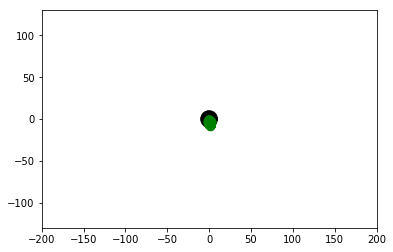

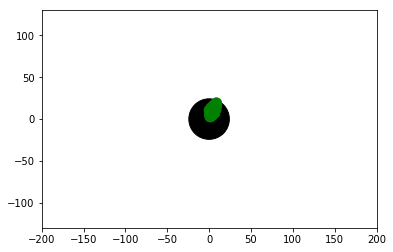

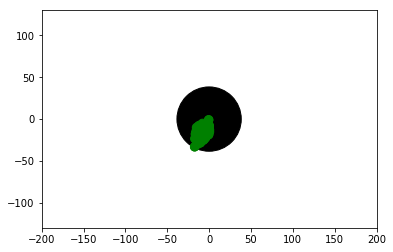

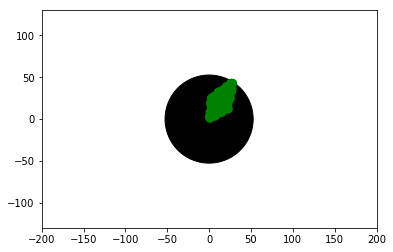

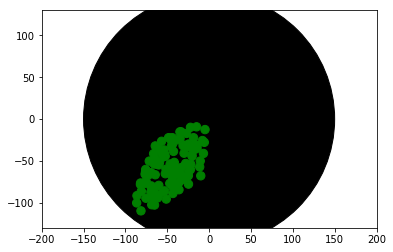

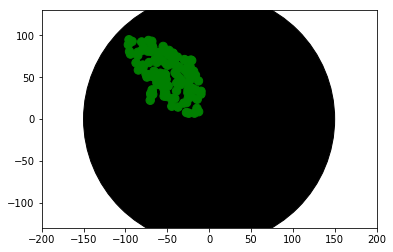

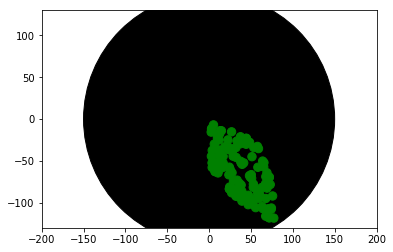

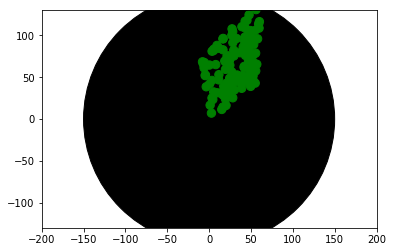

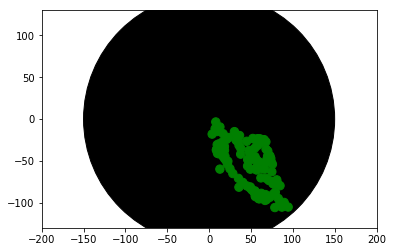

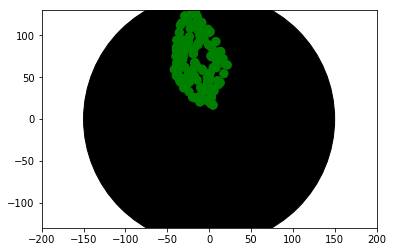

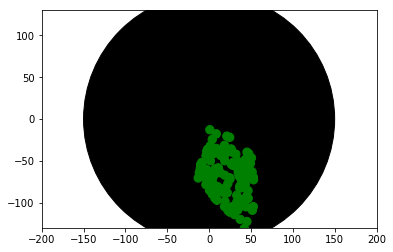

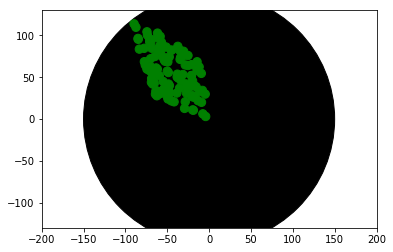

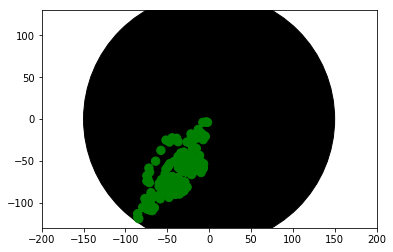

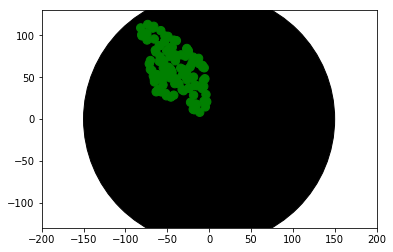

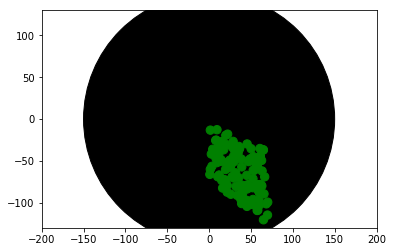

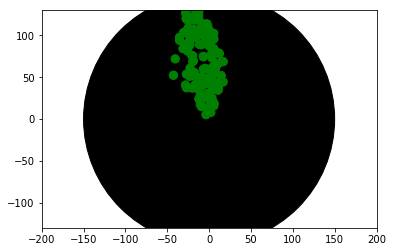

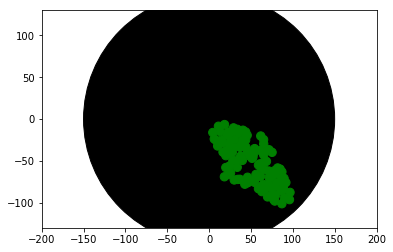

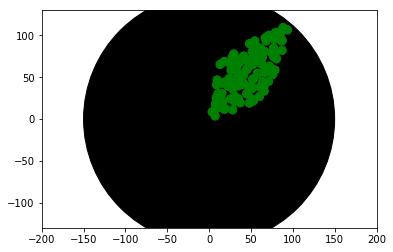

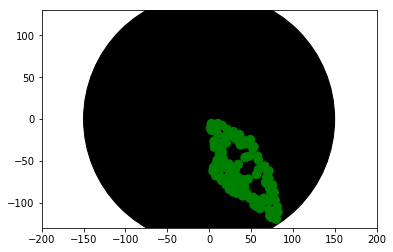

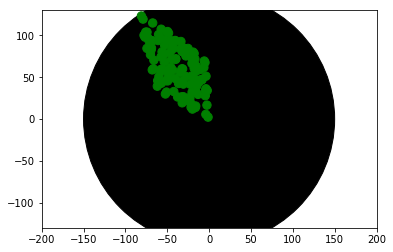

In [39]:
# Generate Main Tree
#user inputs
mainTree = Tree(maxHeight=300,numLayers = 20)
numLeaves = 120

#selfcontained below 
halfNumLeaves = int(numLeaves/2)
leafRad = 5
leafBoundingAngle = (2/8)*np.pi #Unit: radians. leaf center axis will range from the leafBoundingAngle to the leafBoundingAngle+pi


# Generate Layers
for i in range(mainTree.numLayers):
    layerTemp = Layer(height=mainTree.layerHeights[i],radius=mainTree.layerRadii[i],parity = i%2)
    centerLeafAngle = np.random.uniform(leafBoundingAngle,np.pi-leafBoundingAngle) #Unit: radians
    
    # Generate Leaves; fixed radius, random position
    for j in (range(halfNumLeaves)):
        pointTemp = list(genPointFromCircle_polar_sectional(mainTree.layerRadii[i],centerLeafAngle))
        pointTempAlter = list(alterPoint(mainTree.layerRadii[i],centerLeafAngle,pointTemp[0],pointTemp[1]))
        # make all points lie in the o to pi region
        if layerTemp.parity == 0:
            if pointTemp[1] >= 0 and pointTemp[1] < np.pi:
                pass
            else:
                pointTemp[1] += np.pi
                pointTempAlter[1]+= np.pi
        # make all points lie in the pi to 2pi region
        else:
            if pointTemp[1] >= np.pi and pointTemp[1] < 2*np.pi:
                pass
            else:
                pointTemp[1] += np.pi
                pointTempAlter[1]+= np.pi
        leafTemp = Leaf(radius=leafRad, posOnLayer=pointTemp)
        leafTempAlter = Leaf(radius=leafRad, posOnLayer=pointTempAlter)
        
        layerTemp.addLeaf(leafTemp)
        layerTemp.addLeaf(leafTempAlter)
        
    mainTree.addLayer(layerTemp)

# Plot Layers
for i in range(mainTree.numLayers):
    mainTree.layers[i].plotLayer()

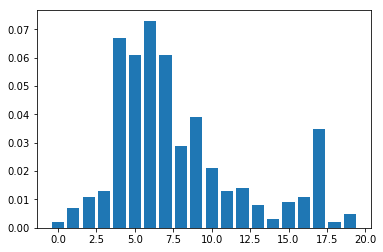

Light Absorbed: 48.40000000000001%


In [40]:
# check penetration
penTree = penetrationTree(mainTree,1000)

plt.bar(range(mainTree.numLayers), penTree)
plt.show()

pctAbsorbed = sum(penTree)*100
print('Light Absorbed: {}%'.format(pctAbsorbed))

In [ ]:
help(np.random.uniform)

In [ ]:
np.random.uniform((-1/4)*np.pi,(1/4)*np.pi)